In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Model Metrics (General)

The following are metrics for the 4 different models tested on 4 different datasets. All were used with k-fold cross validation (k=5), and Matrix Factorization for value imputation when applicable.

In [15]:
all_feat_dx = pd.read_csv('csv/all_feat_dx.csv', index_col=0)
all_feat_dxsub = pd.read_csv('csv/all_feat_dxsub.csv', index_col=0)
tmcq_dx = pd.read_csv('csv/TMCQ_dx.csv', index_col=0)
neuro_dx = pd.read_csv('csv/neuro_dx.csv', index_col=0)

In [16]:
all_feat_dx

,fit_time,score_time,test_accuracy,test_neg_log_loss,test_roc_auc
LogReg,7.359195,6.148368,0.908857,-0.210793,0.970855
RandomForest,9.452390,11.709227,0.928719,-0.427597,0.955042
GradientBoosting,11.417555,18.912921,0.933705,-0.227142,0.967760
XGB,13.787223,24.229599,0.927080,-0.211612,0.969984


In [121]:
def make_graphs(df):
    fig, axs = plt.subplots(3,figsize=(10,15))
    ind = np.arange(1,5)
    models = ['LogReg', 'RandomForest', 'GradientBoosting', 'XGBoost']

    # Accuracy
    acc_max = np.max(df['test_accuracy']) + 0.01
    acc_min = np.min(df['test_accuracy']) - 0.01
    pl, pr, pg, px = axs[0].bar(ind, df['test_accuracy'])
    pl.set_facecolor('r')
    pr.set_facecolor('g')
    pg.set_facecolor('b')
    px.set_facecolor('purple')
    axs[0].set_xticks(ind)
    axs[0].set_xticklabels(models)
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Test Accuracy on models')
    axs[0].set_ylim(acc_min, acc_max)   
    
    # Log Loss
    log_max = np.max(df['test_neg_log_loss']) + 0.05
    log_min = np.min(df['test_neg_log_loss']) - 0.05
    pl, pr, pg, px = axs[1].bar(ind, df['test_neg_log_loss'])
    pl.set_facecolor('r')
    pr.set_facecolor('g')
    pg.set_facecolor('b')
    px.set_facecolor('purple')
    axs[1].set_xticks(ind)
    axs[1].set_xticklabels(models)
    axs[1].set_ylabel('Log Loss')
    axs[1].set_title('Test Log Loss on models')
    axs[1].set_ylim(log_min, log_max)  
    
    # ROC AUC
    roc_max = np.max(df['test_roc_auc']) + 0.01
    roc_min = np.min(df['test_roc_auc']) - 0.01
    pl, pr, pg, px = axs[2].bar(ind, df['test_roc_auc'])
    pl.set_facecolor('r')
    pr.set_facecolor('g')
    pg.set_facecolor('b')
    px.set_facecolor('purple')
    axs[2].set_xticks(ind)
    axs[2].set_xticklabels(models)
    axs[2].set_ylabel('ROC AUC')
    axs[2].set_title('Test ROC AUC on models')
    axs[2].set_ylim(roc_min, roc_max)

# All Features, DX

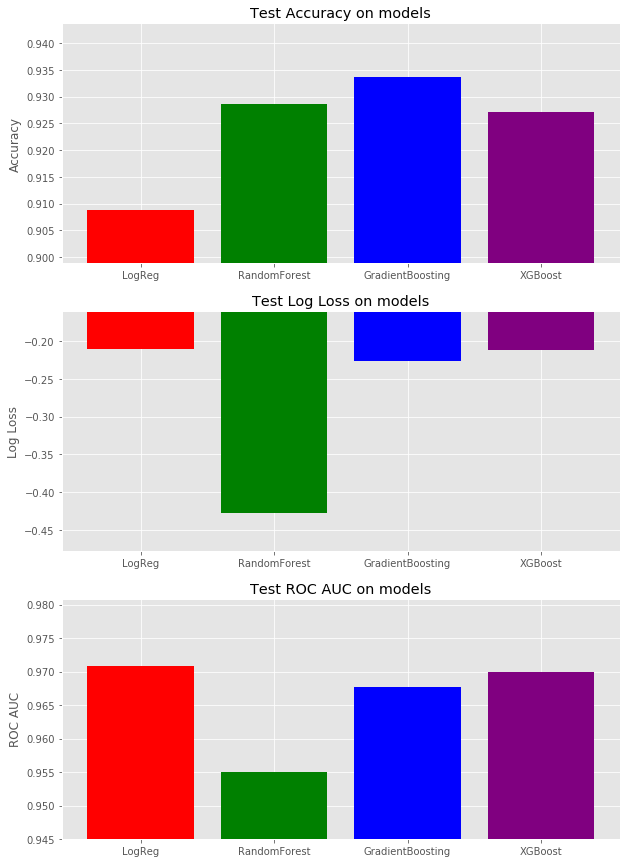

In [122]:
make_graphs(all_feat_dx)

# All Features, DXSUB

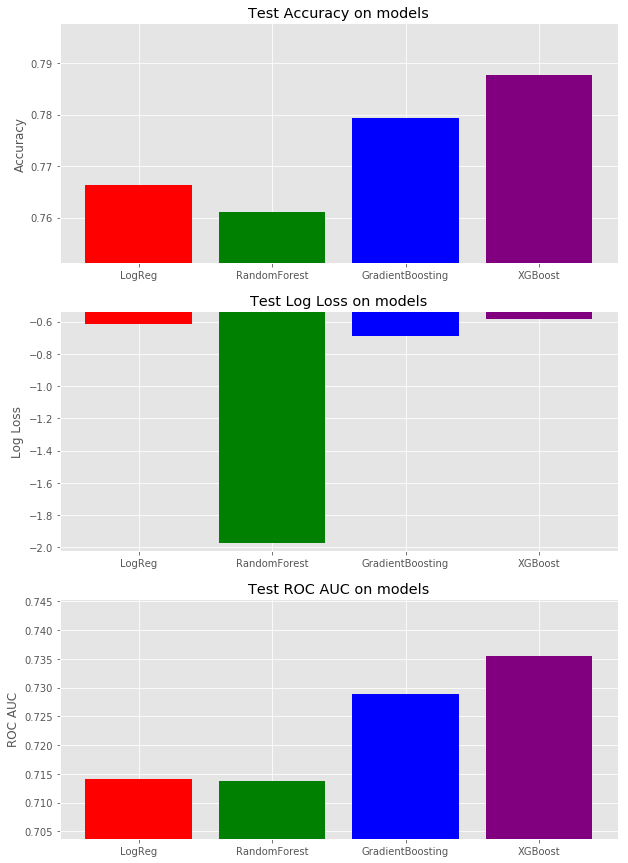

In [123]:
make_graphs(all_feat_dxsub)

# TMCQ, DX

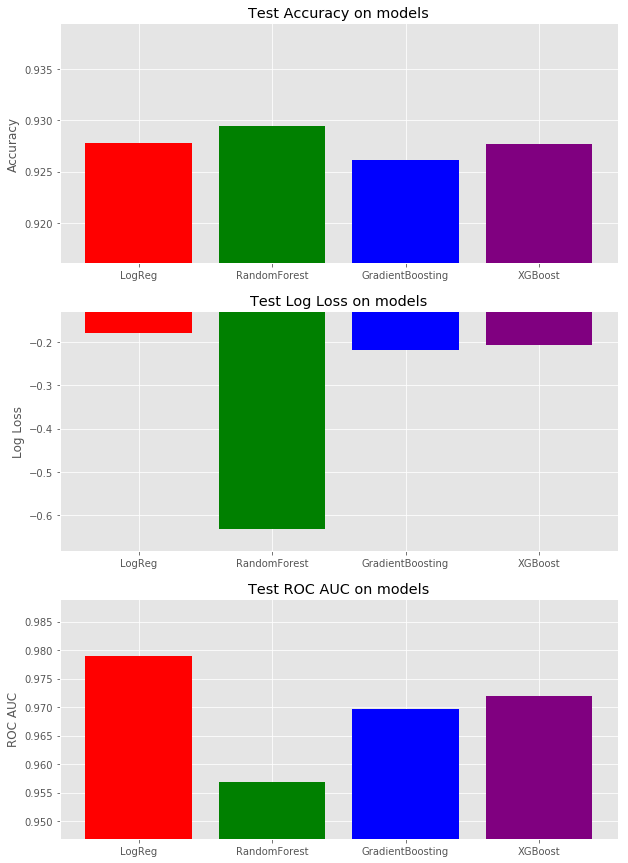

In [124]:
make_graphs(tmcq_dx)

# Neuro, DX

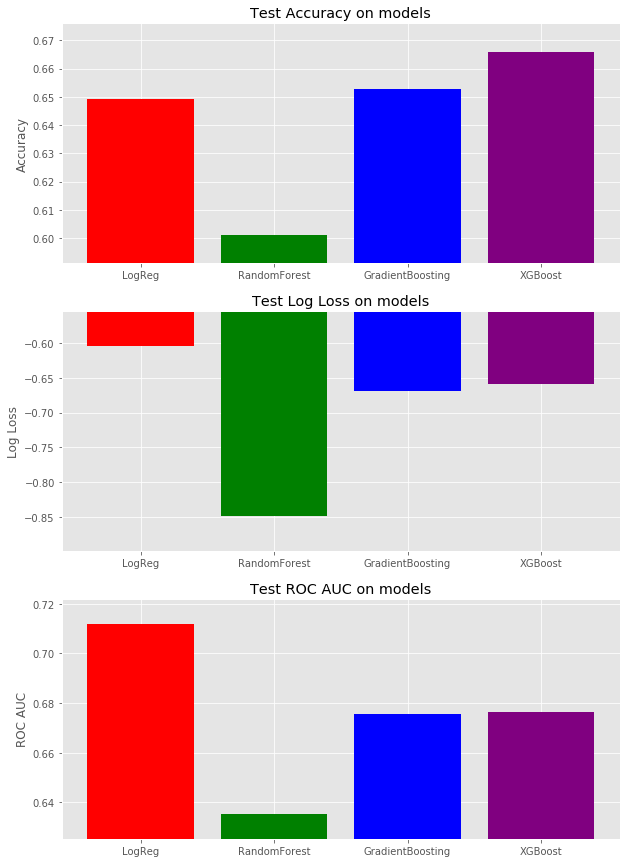

In [125]:
make_graphs(neuro_dx)

## Conclusions:
LogReg and XGBoost are the regular winners. For smaller datasets (TMCQ and Neuro), LogReg outperforms.